# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




## 1. Importación de paquetes y dataset

Importación del dataset

In [1]:
import pandas as pd

In [27]:


# Cargar el archivo "credit-test.csv" y seleccionar columnas específicas
columns_to_select_test = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
                          'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 
                          'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
                          'euribor3m', 'nr_employed']

df_test = pd.read_csv('credit-test.csv', usecols=columns_to_select_test)

# Cargar el archivo "credit-train.csv" y seleccionar columnas específicas
columns_to_select_train = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
                           'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 
                           'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
                           'euribor3m', 'nr_employed', 'y']

df_train = pd.read_csv('credit-train.csv', usecols=columns_to_select_train)


In [28]:
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [29]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## 1. Estructura básica e inspección

Las tablas en `pandas` son objetos de la clase `DataFrames`. Un `DataFrame` consta de dos partes: un índice y los datos propiamente dichos. Las columnas de los datos son de la clase `Series`

Para consultar las columnas de un `DataFrame`, accedemos a la propiedad `columns`.

1. Identificación de datos faltantes:
Utiliza el método .isnull() en tu DataFrame para identificar los valores nulos en cada columna.
Usa la función .sum() para contar cuántos valores nulos hay en cada columna.
Considera eliminar las filas o columnas con un número excesivo de valores nulos, si es apropiado para tu conjunto de datos.
Para las columnas con valores faltantes, decide cómo manejarlos:
Puedes eliminar las filas con valores faltantes si hay una pequeña cantidad de datos faltantes y no afectan significativamente tu análisis.
Puedes imputar los valores faltantes utilizando técnicas como la media, la mediana o el valor más frecuente, según el tipo de datos y el contexto del problema.

In [30]:
import pandas as pd

# Carga de los datos
df = pd.read_csv("credit-train.csv")

# Identificación de datos faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# Identificación de datos atípicos en columnas numéricas
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Valores atípicos por columna:\n", outliers)


Valores faltantes por columna:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
Valores atípicos por columna:
 age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp_var_rate         0
cons_price_idx       0
cons_conf_idx      447
euribor3m            0
nr_employed          0
dtype: int64


 analizar los valores atípicos en la columna "age" del archivo "credit-train.csv":

 identificar las columnas categóricas, explorar sus valores únicos y crear columnas categóricas utilizando pandas:

In [35]:
import pandas as pd

# Carga de datos (reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV)
df = pd.read_csv('credit-train.csv')

# Identificar columnas categóricas
columnas_categoricas = ['job', 'marital', 'education']  # Agrega aquí el nombre de tus columnas categóricas

# Explorar los valores únicos en cada columna categórica
for columna in columnas_categoricas:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print()

# Codificación one-hot de las columnas categóricas
df_codificado = pd.get_dummies(df, columns=columnas_categoricas)

# Muestra las primeras filas del DataFrame codificado
print("DataFrame con columnas categóricas codificadas:")
print(df_codificado.head())


Valores únicos en la columna 'job':
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

Valores únicos en la columna 'marital':
['married' 'single' 'divorced' 'unknown']

Valores únicos en la columna 'education':
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

DataFrame con columnas categóricas codificadas:
   age  default housing loan   contact month day_of_week  duration  campaign  \
0   44  unknown     yes   no  cellular   aug         thu       210         1   
1   53       no      no   no  cellular   nov         fri       138         1   
2   28       no     yes   no  cellular   jun         thu       339         3   
3   39       no      no   no  cellular   apr         fri       185         2   
4   55       no     yes   no  cellular   aug         fri       137         1   

   pdays  ...  marital_single marital_unkno

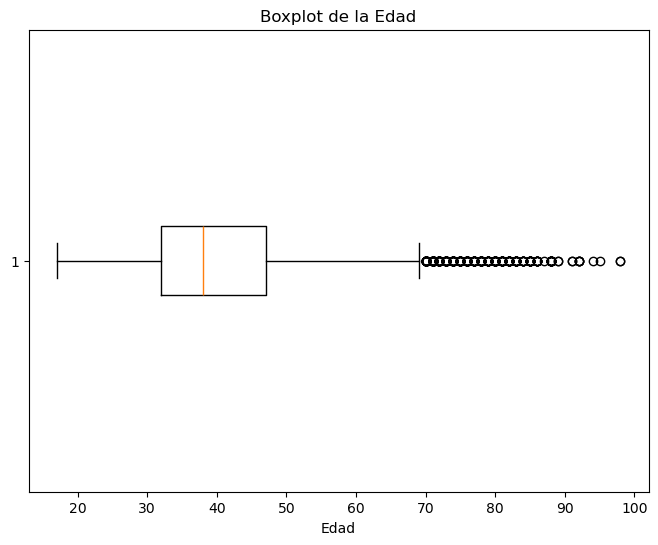

Valores atípicos en la columna 'age':
       age        job   marital    education  default housing loan    contact  \
43      72    retired  divorced     basic.6y       no     yes   no   cellular   
307     74    retired  divorced  high.school       no     yes  yes  telephone   
334     80    retired   married     basic.4y       no      no   no   cellular   
454     72    retired   married  high.school       no      no   no   cellular   
559     75    retired  divorced     basic.9y       no      no   no   cellular   
...    ...        ...       ...          ...      ...     ...  ...        ...   
40901   88    retired  divorced     basic.4y       no     yes   no   cellular   
40905   76    retired   married     basic.4y       no     yes   no   cellular   
40906   75    retired  divorced     basic.4y       no      no   no   cellular   
41001   82  housemaid   married     basic.4y       no      no   no  telephone   
41123   80    retired   married     basic.4y  unknown     yes   no   ce

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de los datos
df = pd.read_csv("credit-train.csv")

# Creación del boxplot para la columna "age"
plt.figure(figsize=(8,6))
plt.boxplot(df['age'], vert=False)
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

# Cálculo del rango intercuartílico (IQR)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identificación de valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Valores atípicos en la columna 'age':")
print(outliers)


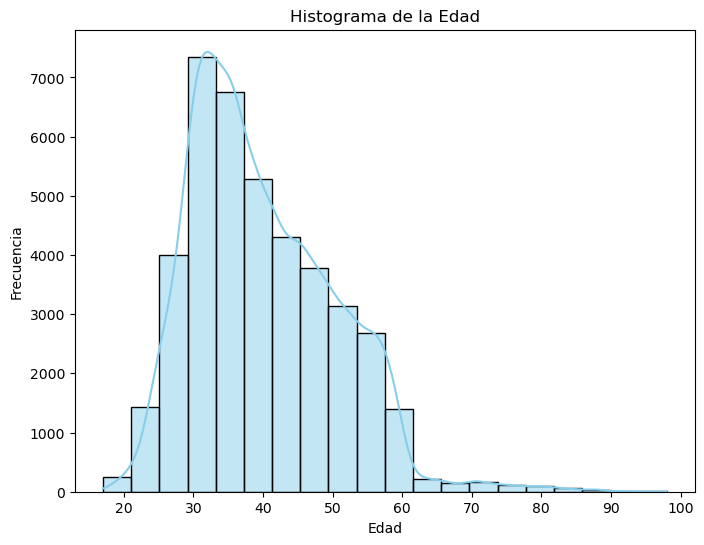

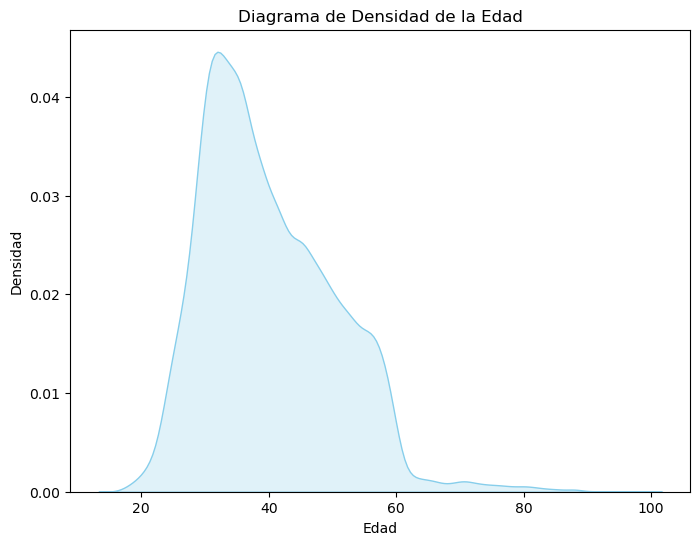

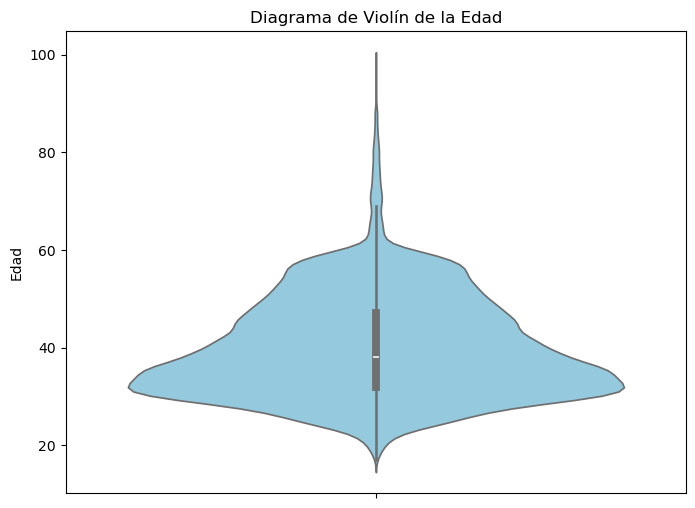

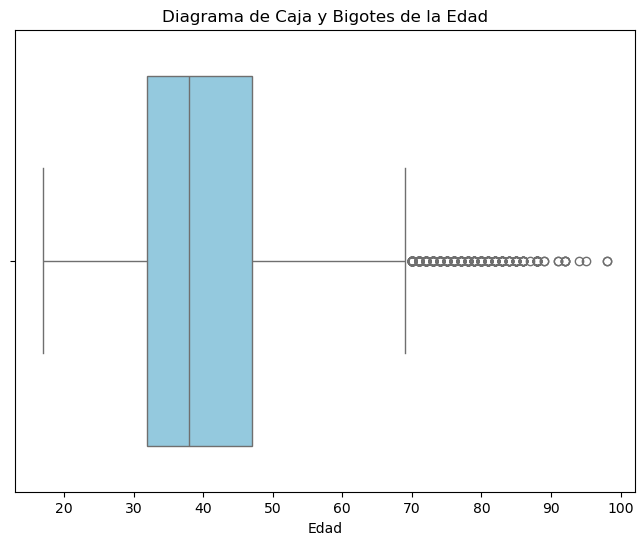

In [36]:
import seaborn as sns

# Histograma
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de densidad
plt.figure(figsize=(8,6))
sns.kdeplot(df['age'], color='skyblue', fill=True)
plt.title('Diagrama de Densidad de la Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

# Diagrama de violín
plt.figure(figsize=(8,6))
sns.violinplot(y=df['age'], color='skyblue')
plt.title('Diagrama de Violín de la Edad')
plt.ylabel('Edad')
plt.show()

# Diagrama de caja y bigotes (boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Diagrama de Caja y Bigotes de la Edad')
plt.xlabel('Edad')
plt.show()


In [ ]:
# Filtrar valores atípicos en la columna 'duration'
duration_outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
# Filtrar valores atípicos en la columna 'campaign'
campaign_outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]
# Filtrar valores atípicos en la columna 'pdays'
pdays_outliers = df[(df['pdays'] < lower_bound) | (df['pdays'] > upper_bound)]
# Filtrar valores atípicos en la columna 'previous'
previous_outliers = df[(df['previous'] < lower_bound) | (df['previous'] > upper_bound)]
# Filtrar valores atípicos en la columna 'cons_conf_idx'
cons_conf_idx_outliers = df[(df['cons_conf_idx'] < lower_bound) | (df['cons_conf_idx'] > upper_bound)]
cons_conf_idx_outliers 

In [34]:
duration_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,24,admin.,married,high.school,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


analizar columna default que contiene 3 en vez dos variables

In [15]:
df['default'].value_counts()


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Resumen estadístico: Calcula estadísticas descriptivas básicas para cada columna, como media, mediana, desviación estándar, valores mínimo y máximo. Esto te dará una idea general de la distribución de tus datos


age: La edad de los clientes varía desde 17 años hasta 98 años, con una media de aproximadamente 40 años y una desviación estándar de alrededor de 10.42 años.

duration: La duración de las llamadas varía desde 0 segundos hasta 4918 segundos, con una media de aproximadamente 258.29 segundos y una desviación estándar de alrededor de 259.28 segundos.

campaign: El número de contactos durante esta campaña varía desde 1 hasta 56, con una media de aproximadamente 2.57 y una desviación estándar de alrededor de 2.77.

pdays: El número de días desde el último contacto anterior varía desde 0 hasta 999 días, con una media de aproximadamente 962.48 días y una desviación estándar de alrededor de 186.91 días.

previous: El número de contactos anteriores varía desde 0 hasta 7, con una media de aproximadamente 0.17 y una desviación estándar de alrededor de 0.49.

emp_var_rate: La tasa de variación del empleo varía desde -3.4 hasta 1.4, con una media de aproximadamente 0.08 y una desviación estándar de alrededor de 1.57.

cons_price_idx: El índice de precios al consumidor varía desde 92.201 hasta 94.767, con una media de aproximadamente 93.58 y una desviación estándar de alrededor de 0.58.

cons_conf_idx: El índice de confianza del consumidor varía desde -50.8 hasta -26.9, con una media de aproximadamente -40.50 y una desviación estándar de alrededor de 4.63.

euribor3m: La tasa de euribor a 3 meses varía desde 0.634 hasta 5.045, con una media de aproximadamente 3.62 y una desviación estándar de alrededor de 1.73.

nr_employed: El número de empleados varía desde 4963.6 hasta 5228.1, con una media de aproximadamente 5167.04 y una desviación estándar de alrededor de 72.25.

y: La variable de destino (y) indica si el cliente suscribió un depósito a plazo (1) o no (0). La media indica que aproximadamente el 11.27% de los clientes suscribieron un depósito a plazo durante esta campaña.

In [17]:
# Resumen estadístico para todas las columnas numéricas
summary_stats = df.describe()

# Mostrar el resumen estadístico
print(summary_stats)


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

HISTORIOGRAMAS

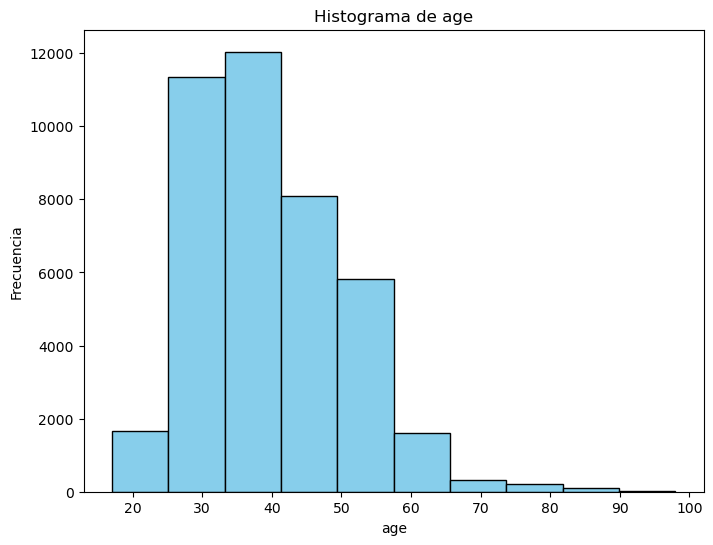

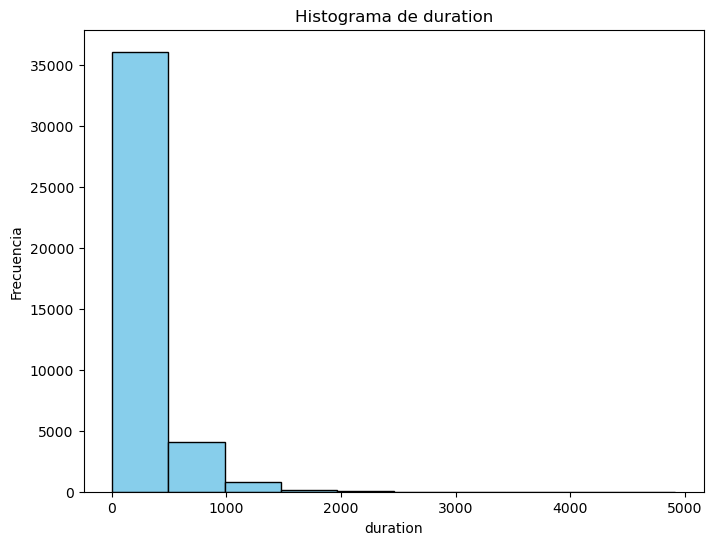

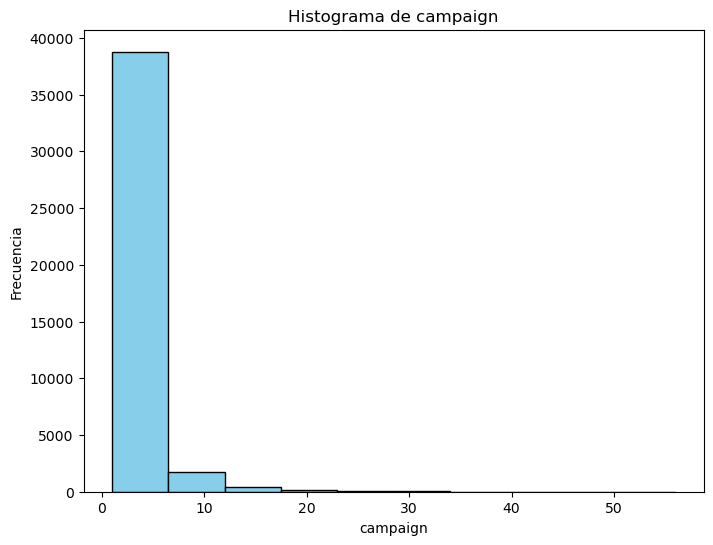

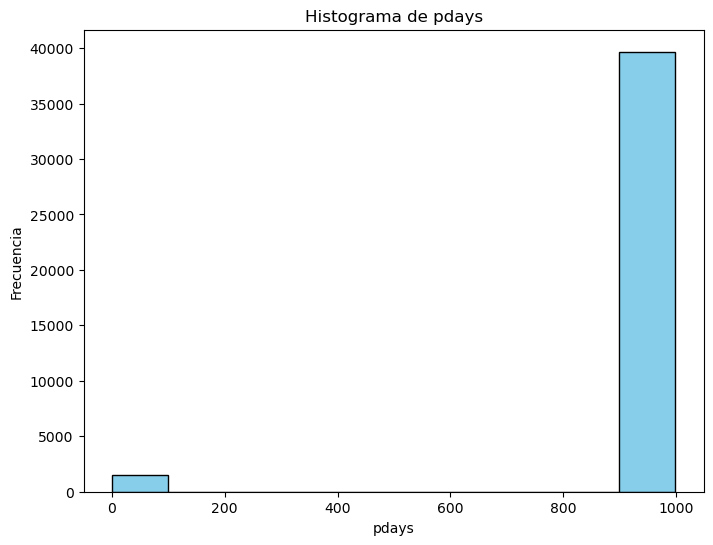

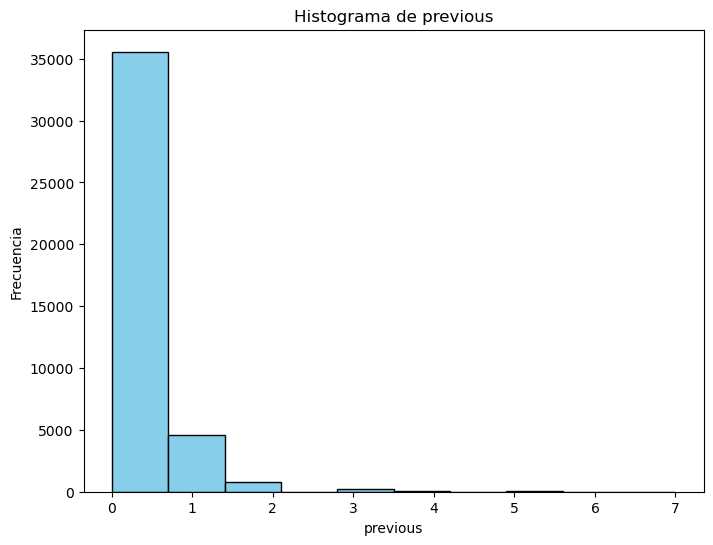

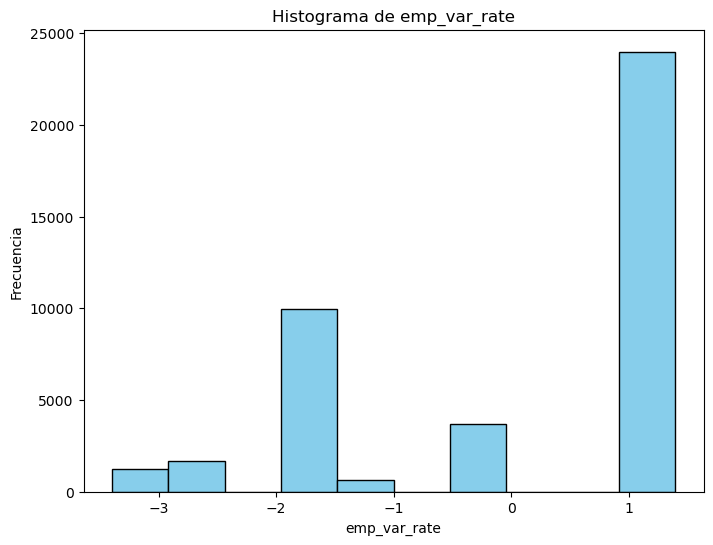

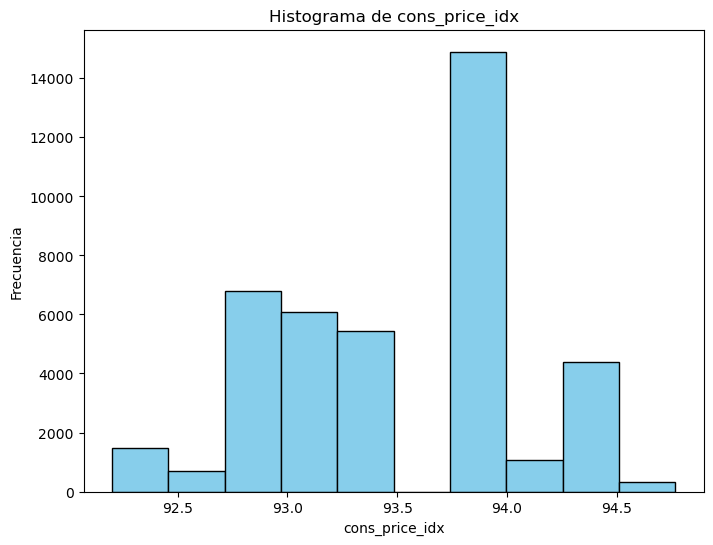

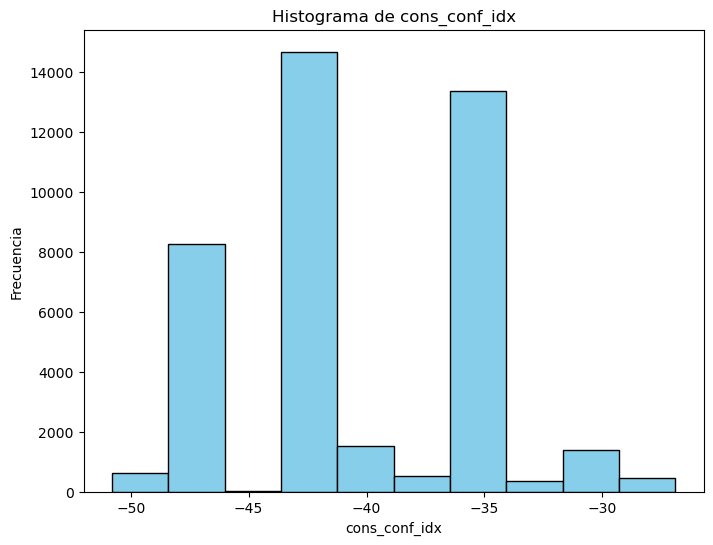

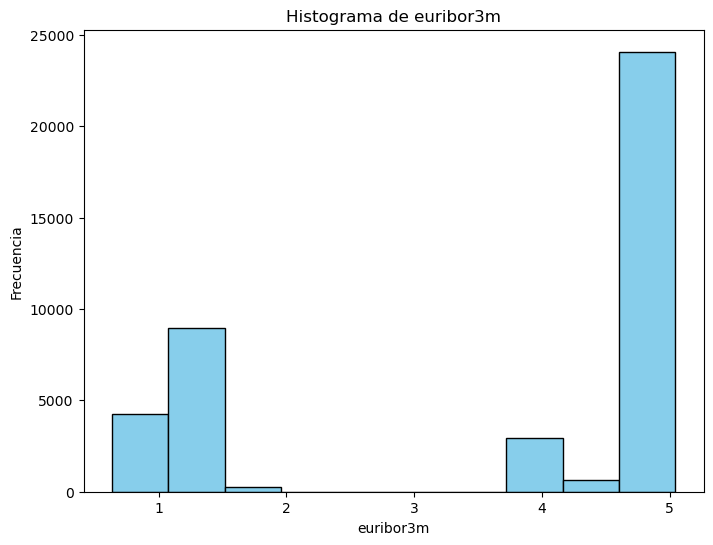

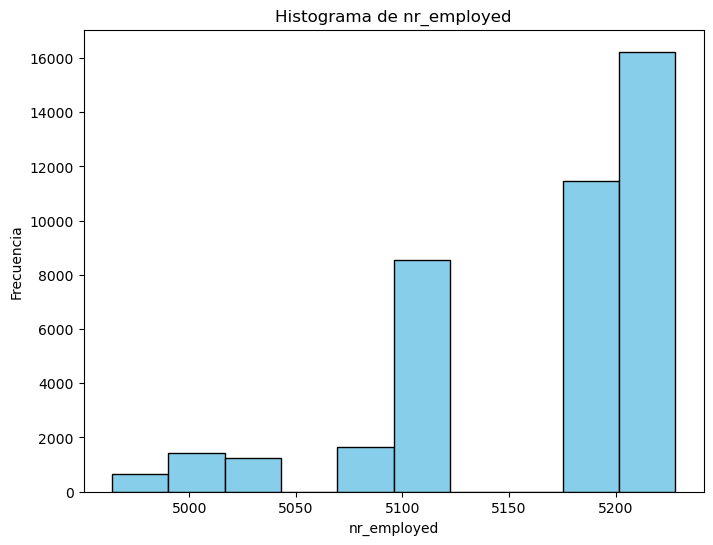

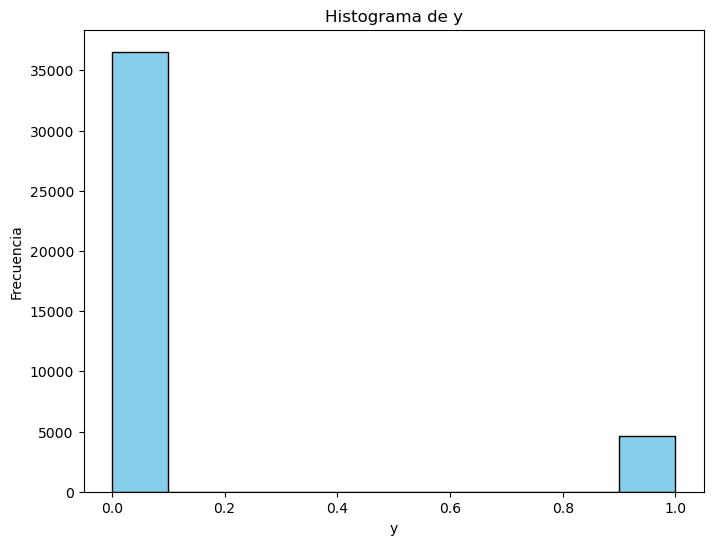

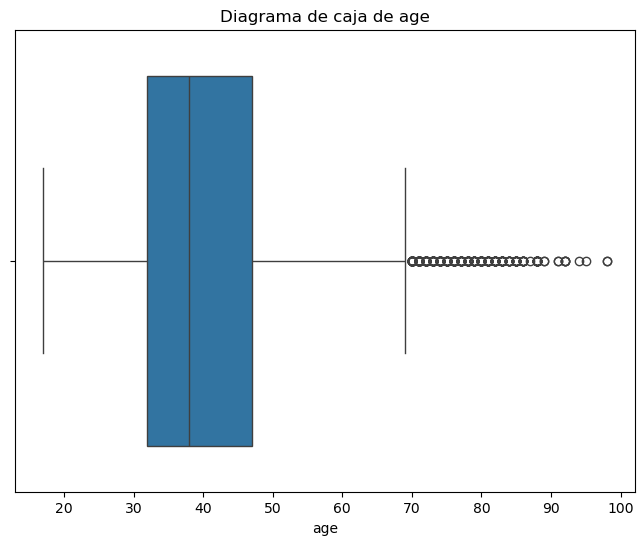

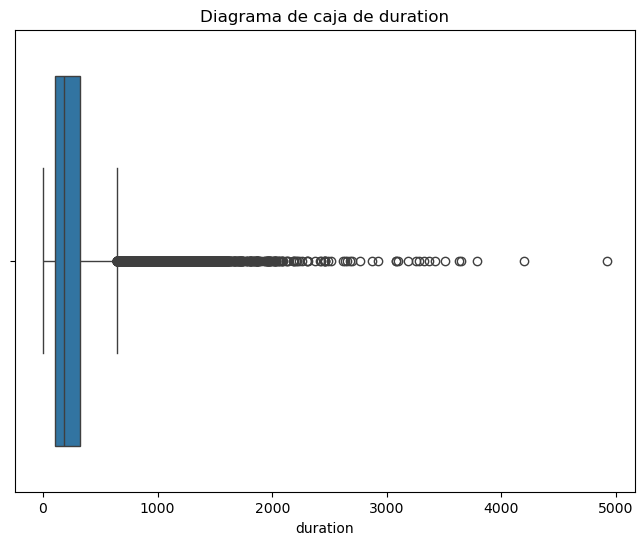

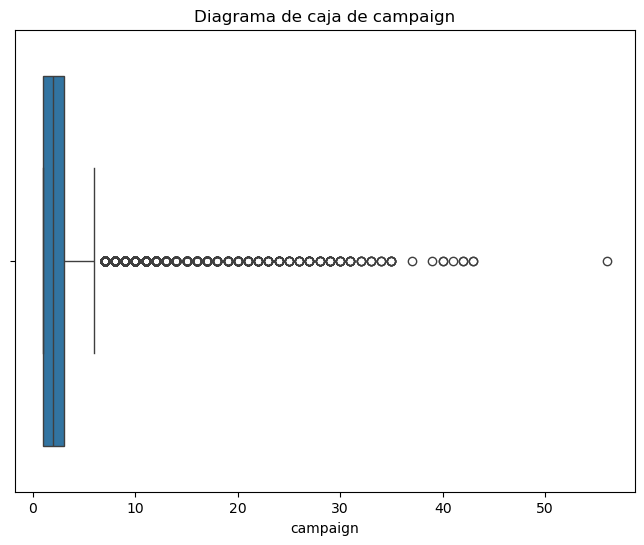

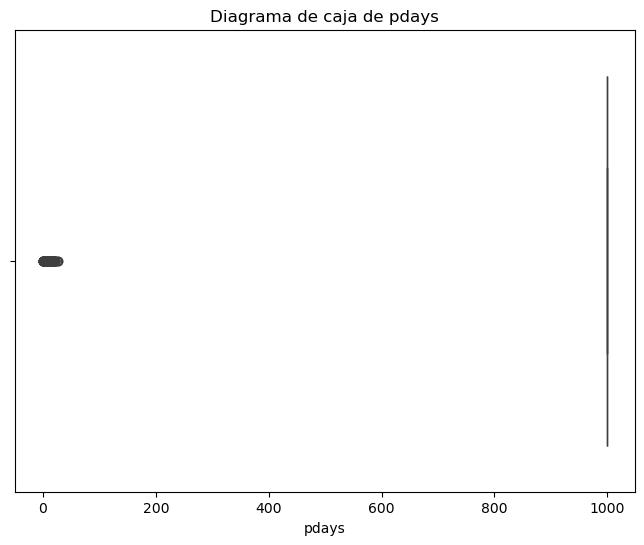

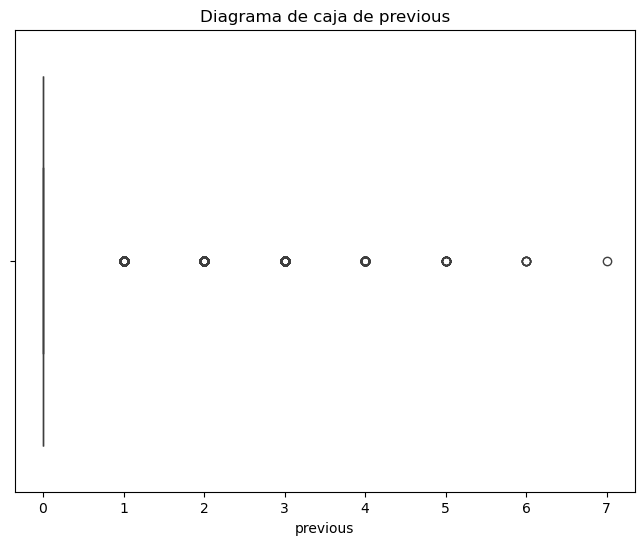

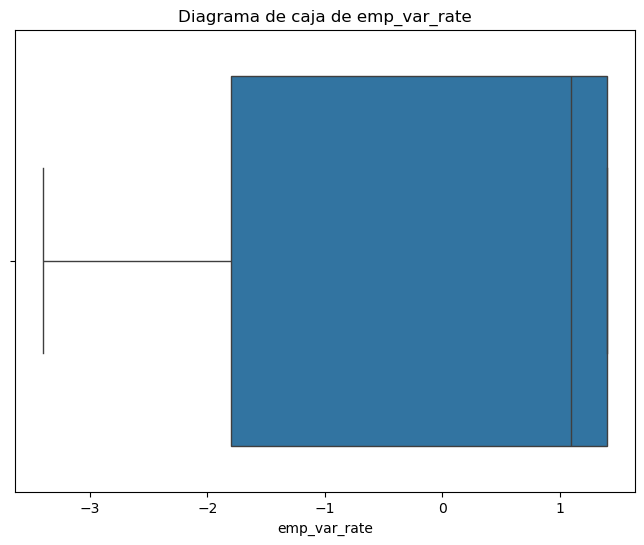

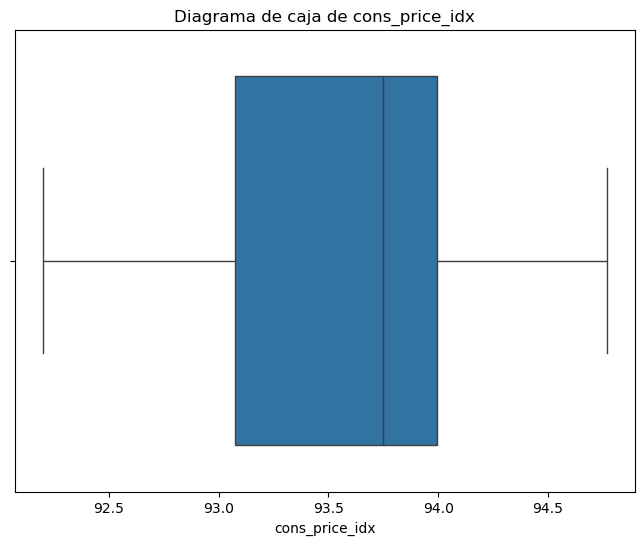

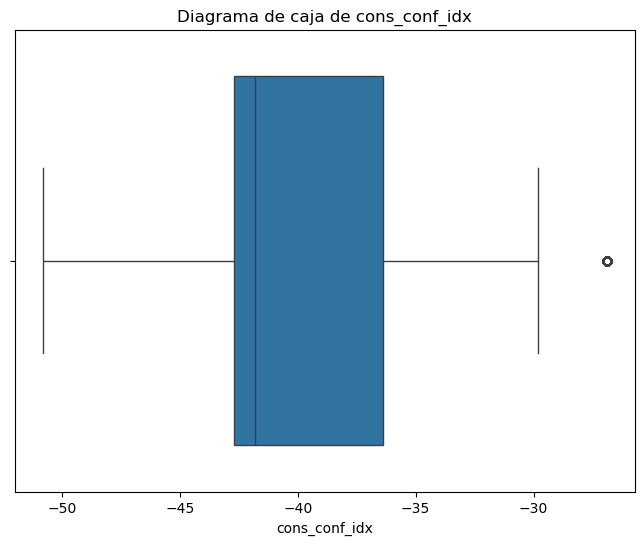

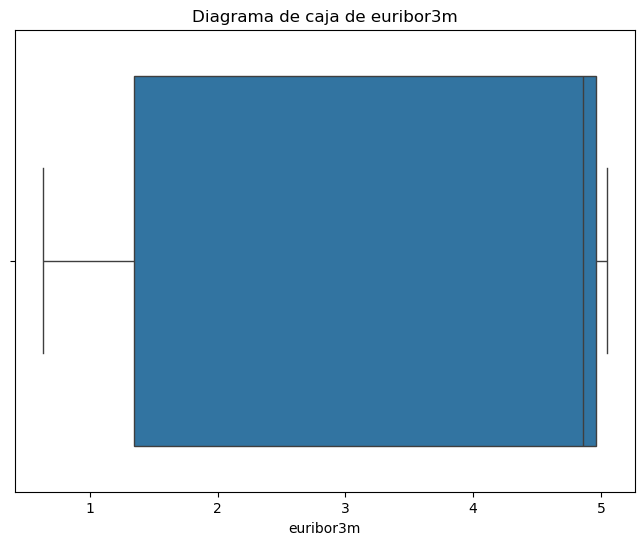

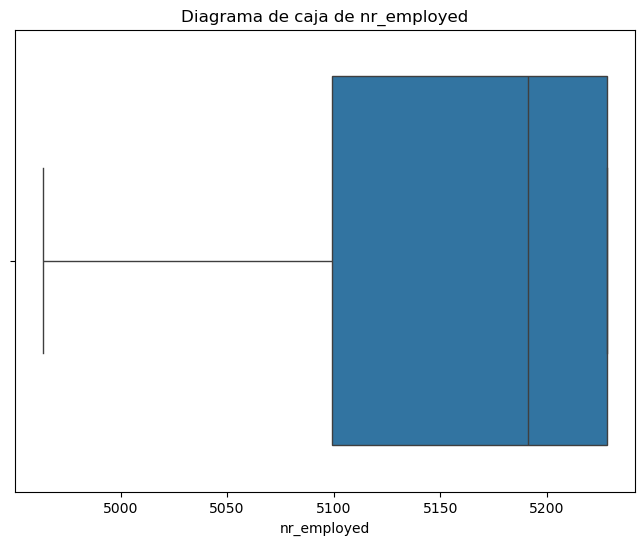

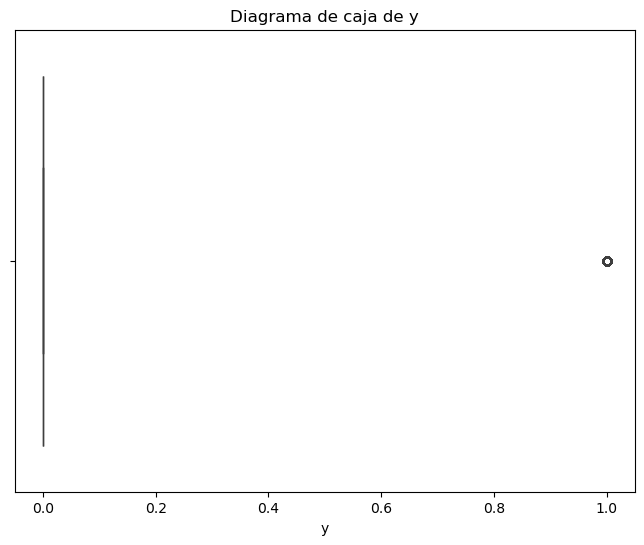

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


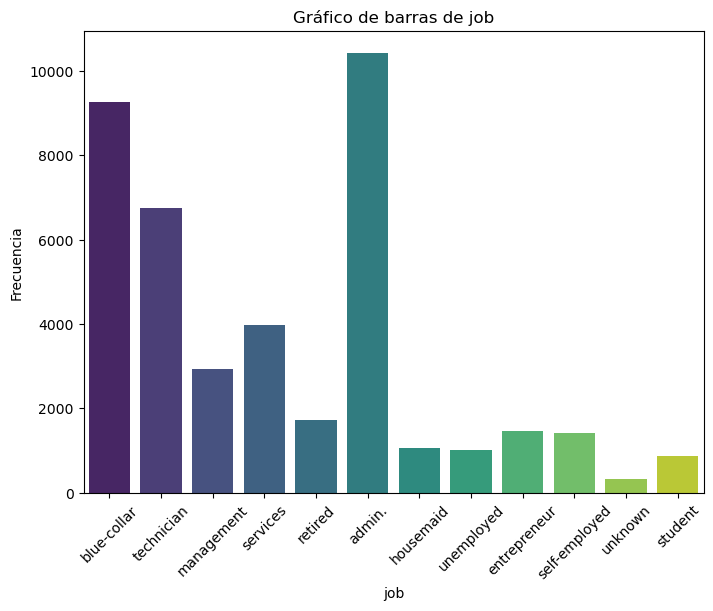

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


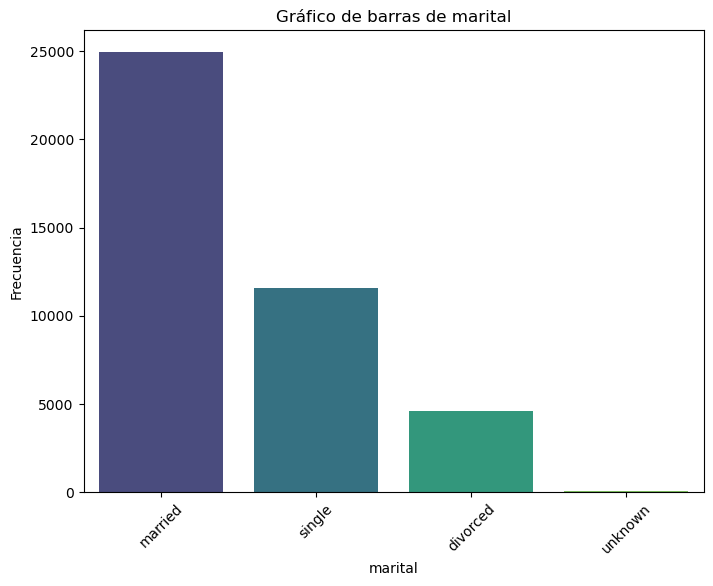

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


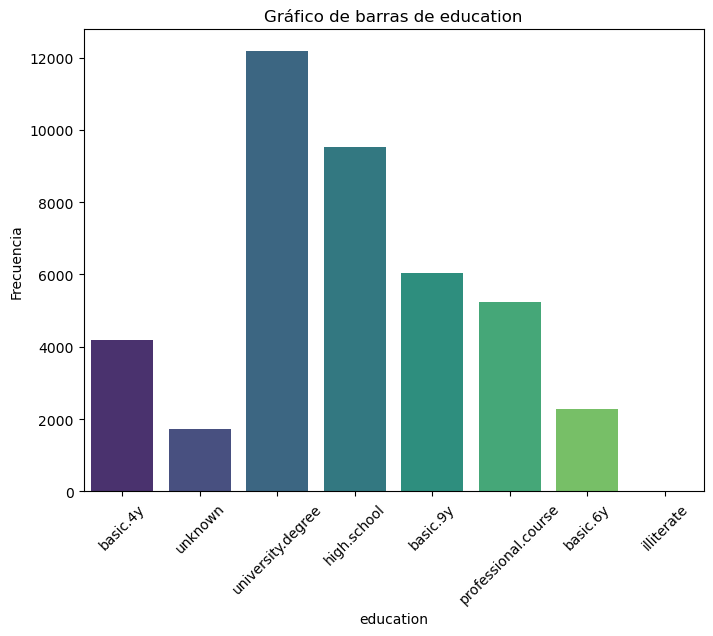

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


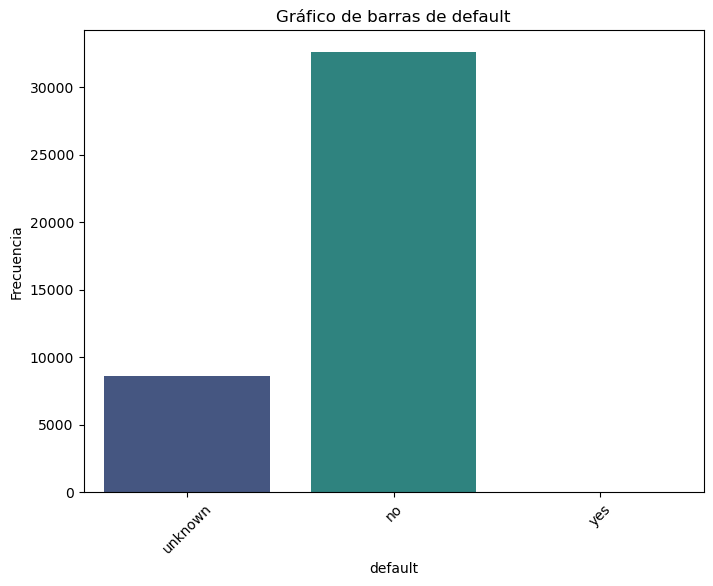

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


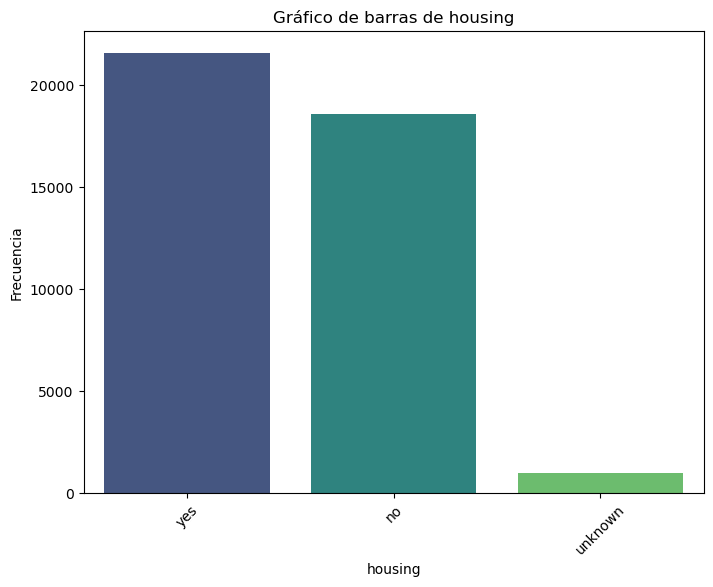

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


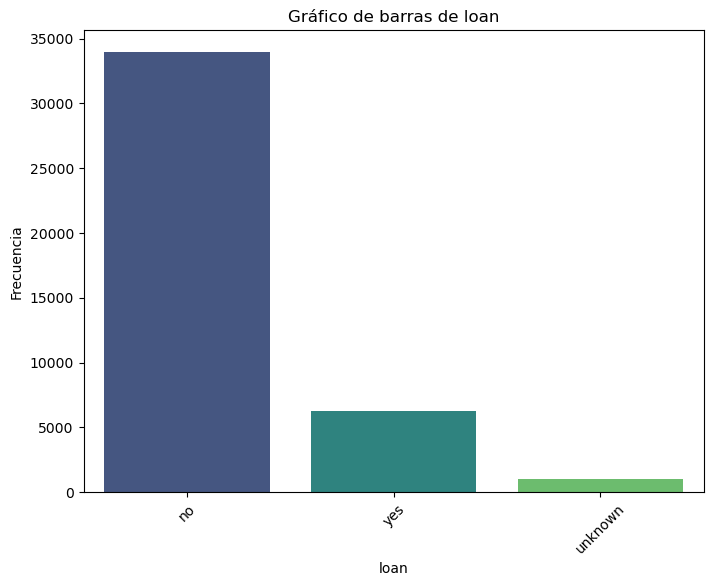

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


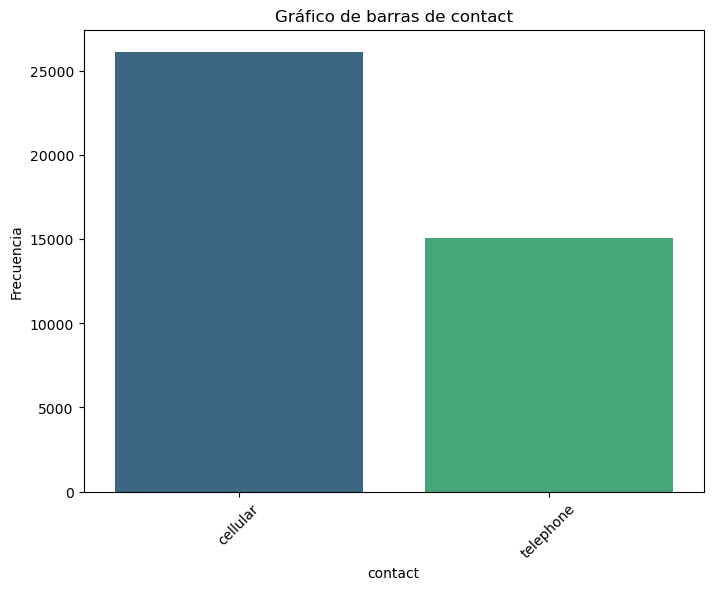

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


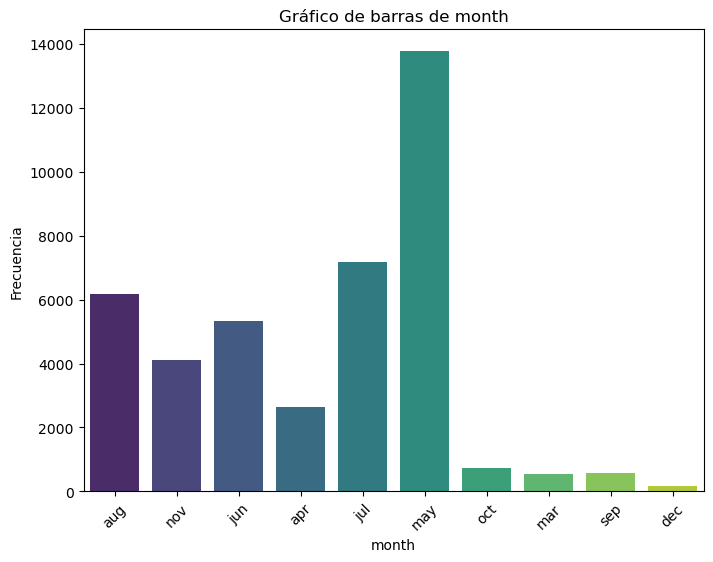

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


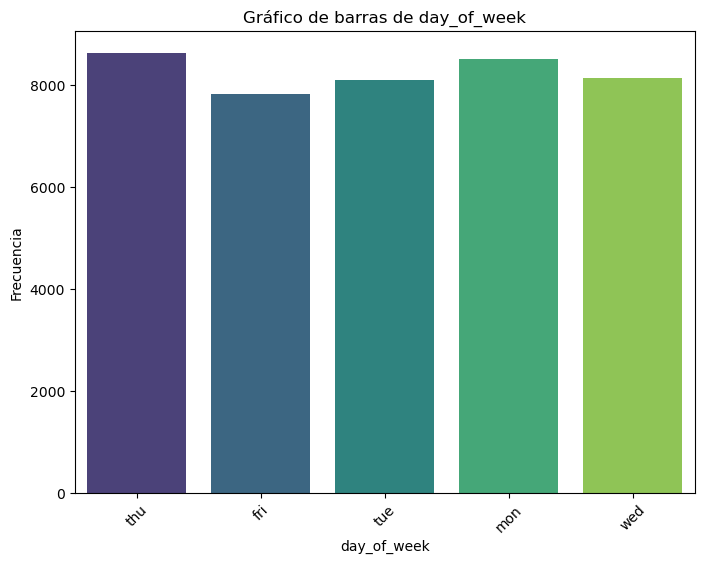

/tmp/ipykernel_182/1829154749.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')


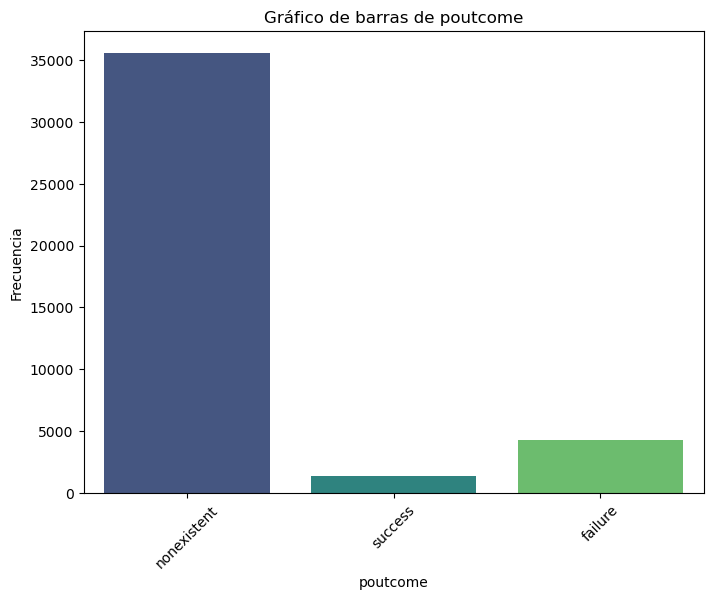

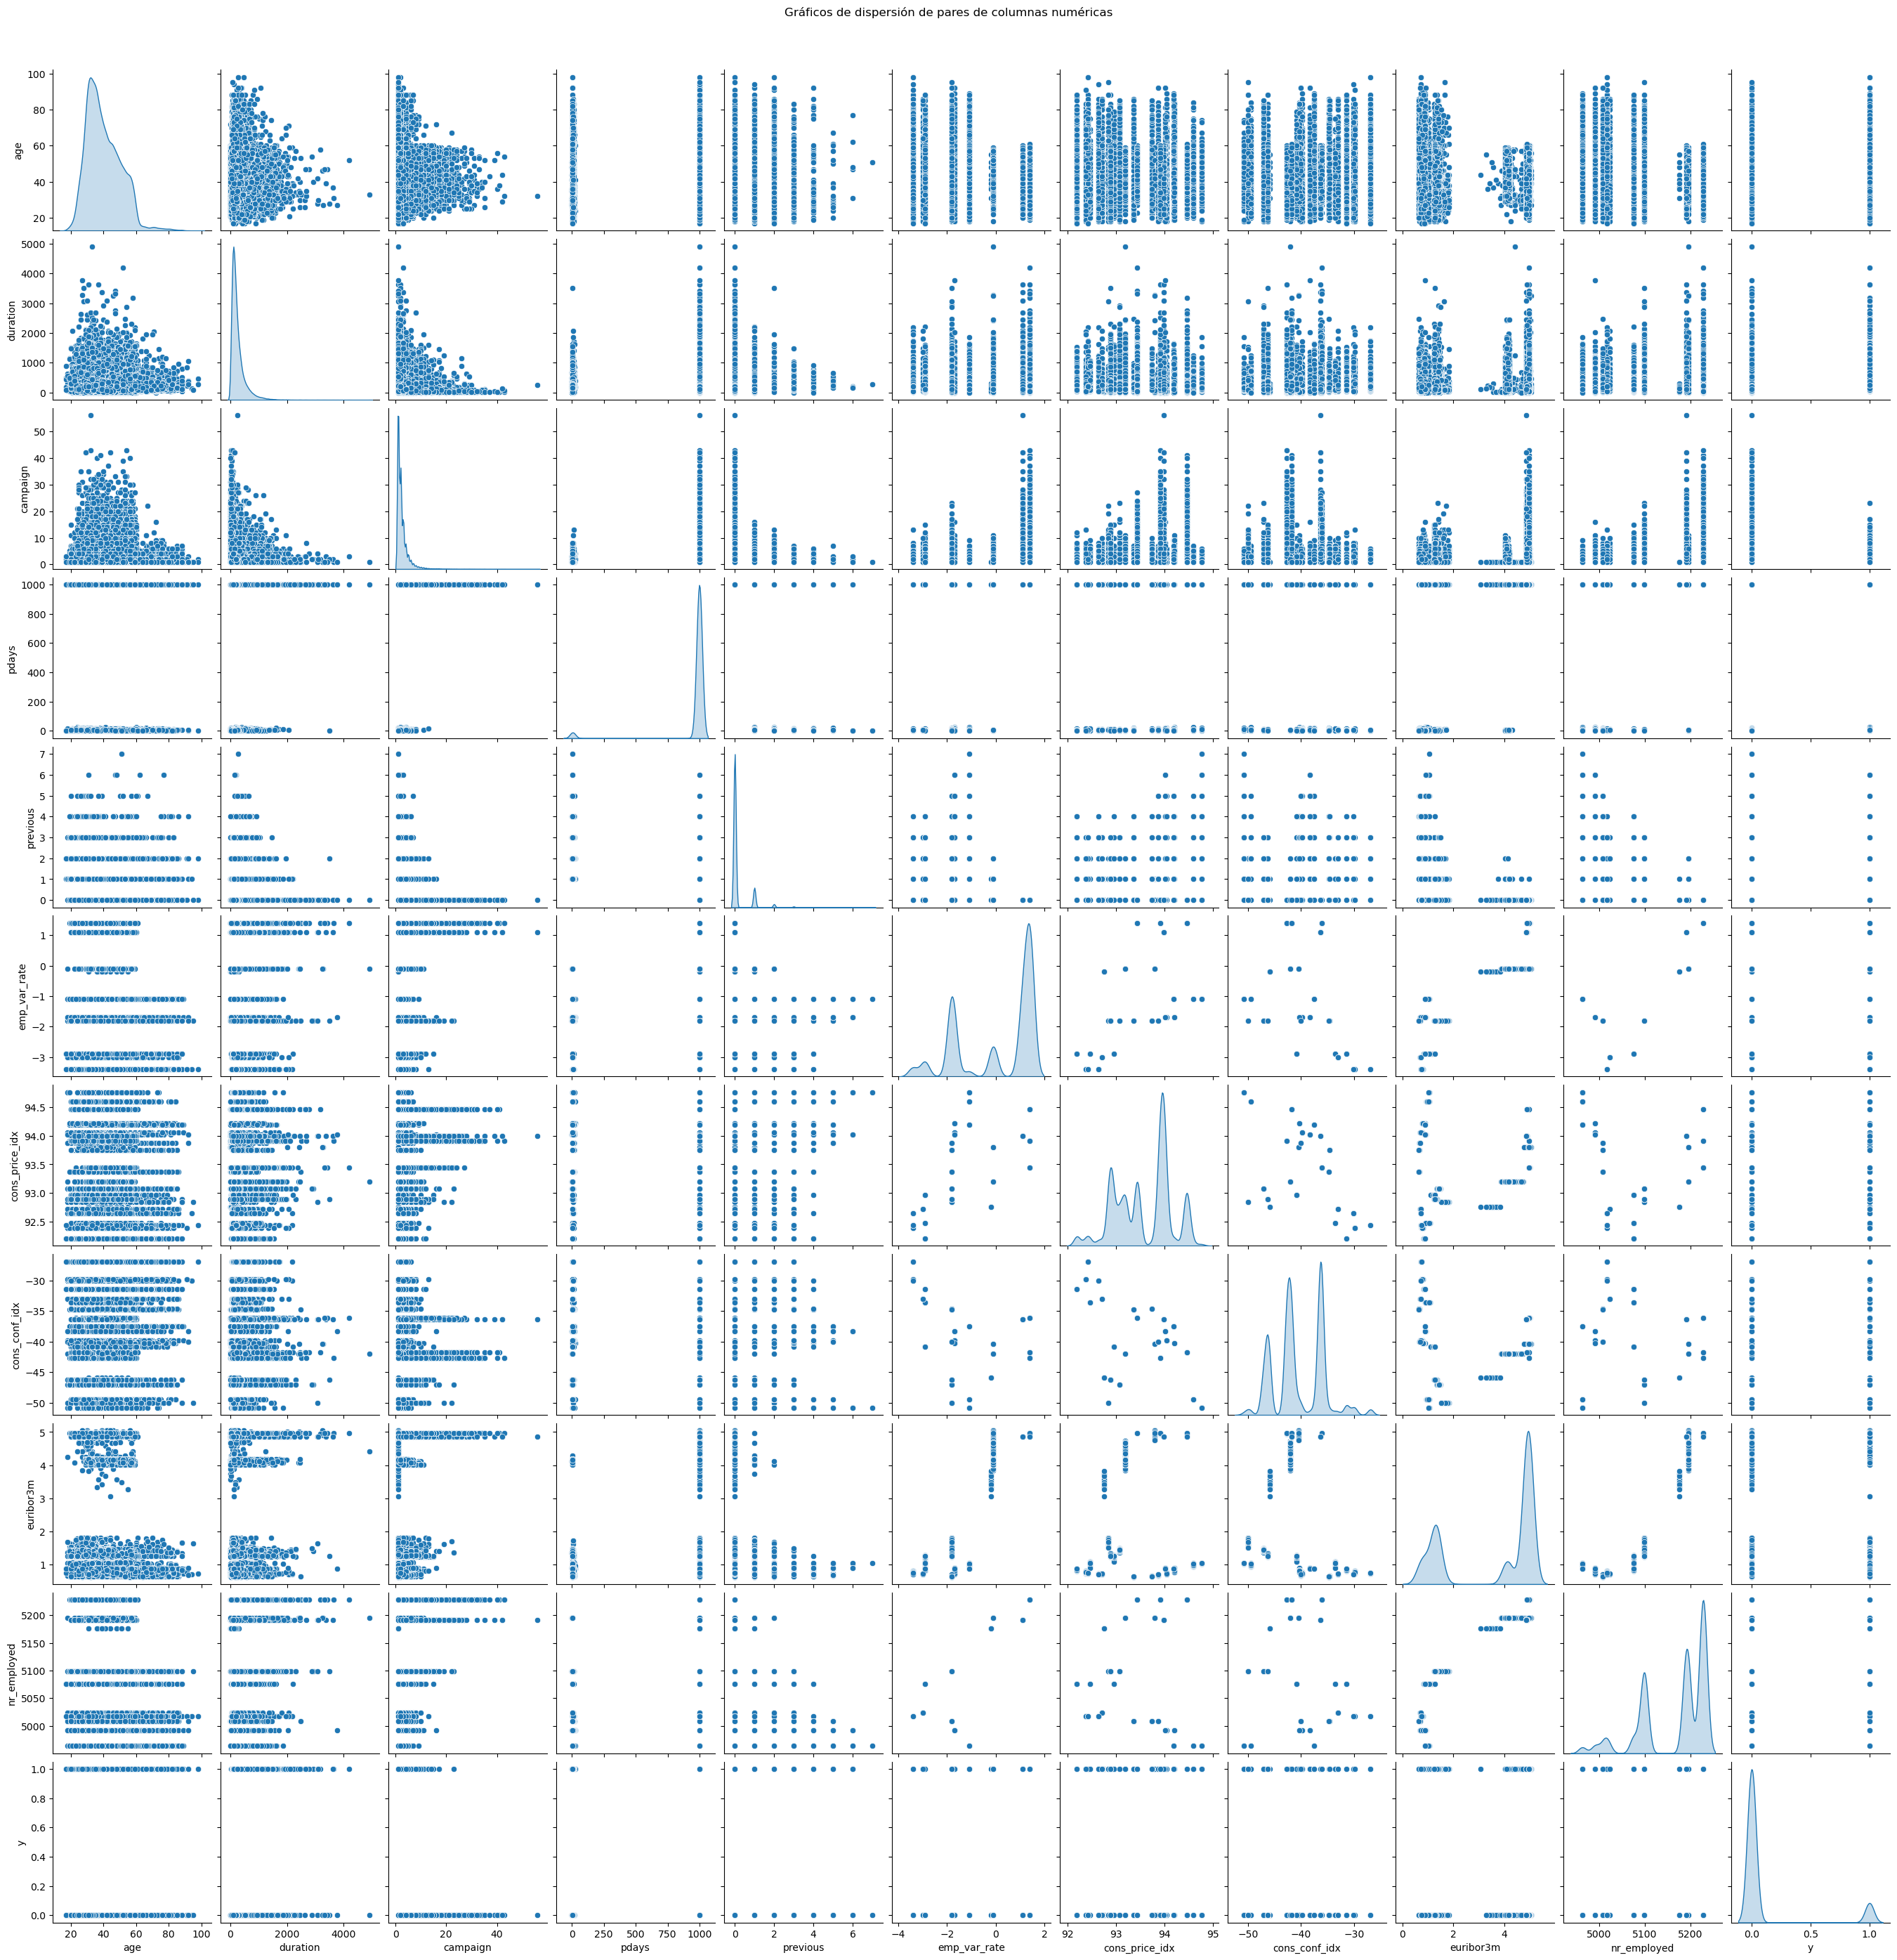

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Diagrama de caja para todas las columnas numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Diagrama de caja de {column}')
    plt.xlabel(column)
    plt.show()

# Gráfico de barras para todas las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Gráfico de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Gráficos de dispersión para pares de columnas numéricas
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.suptitle('Gráficos de dispersión de pares de columnas numéricas', y=1.02)
plt.show()




Eliminar columnas no numericas

In [26]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación')
plt.show()

# Gráficos de dispersión para pares de variables seleccionadas
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'previous']])
plt.suptitle('Gráficos de dispersión de variables seleccionadas', y=1.02)
plt.show()


ValueError: could not convert string to float: 'blue-collar'

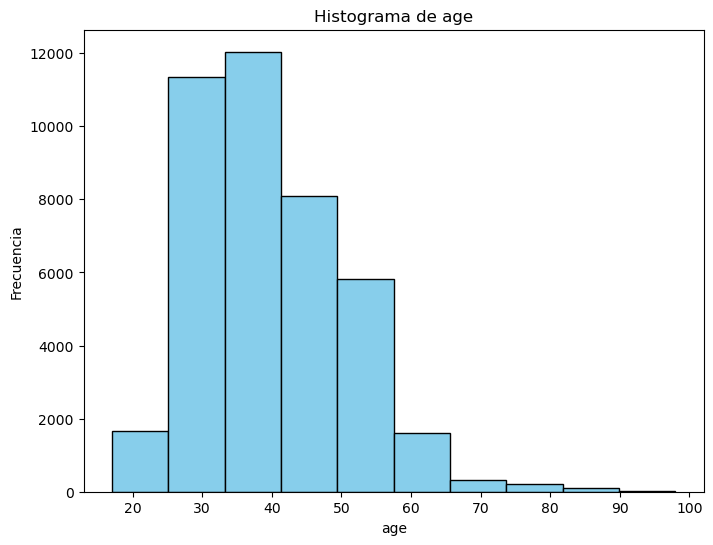

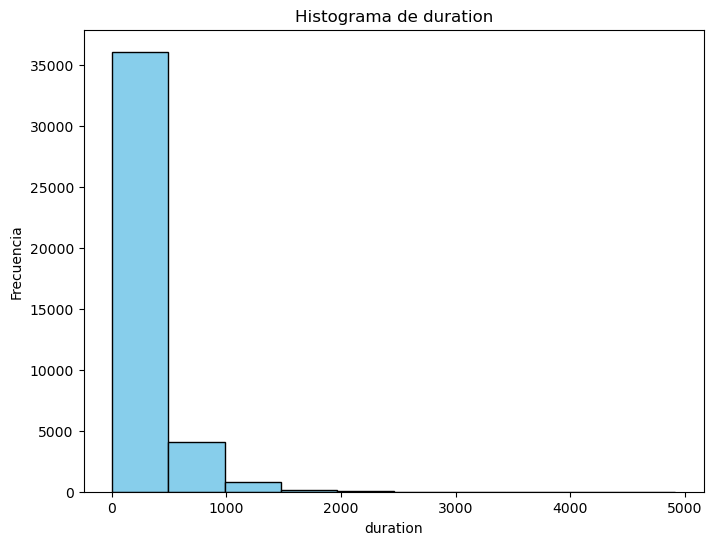

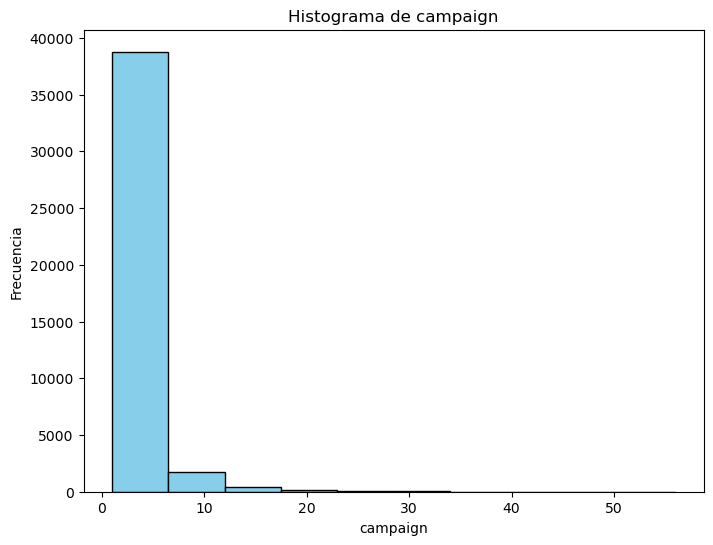

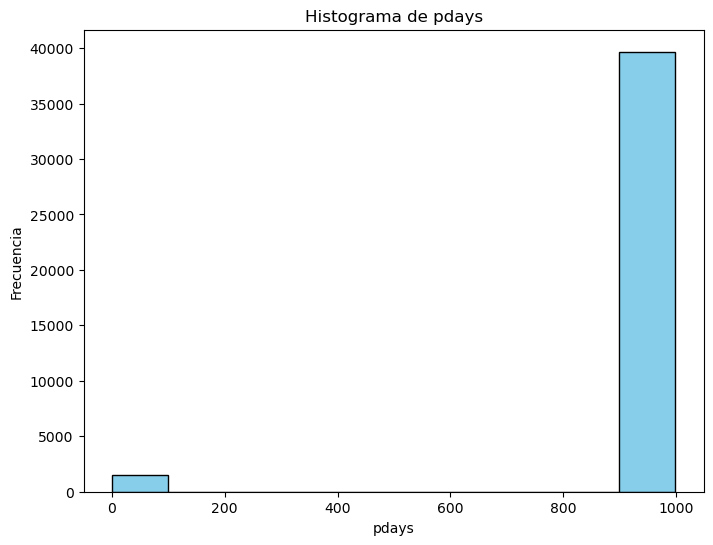

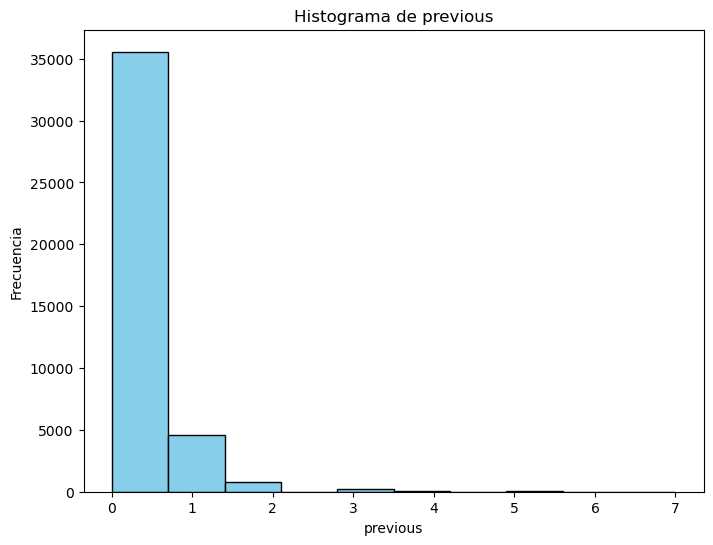

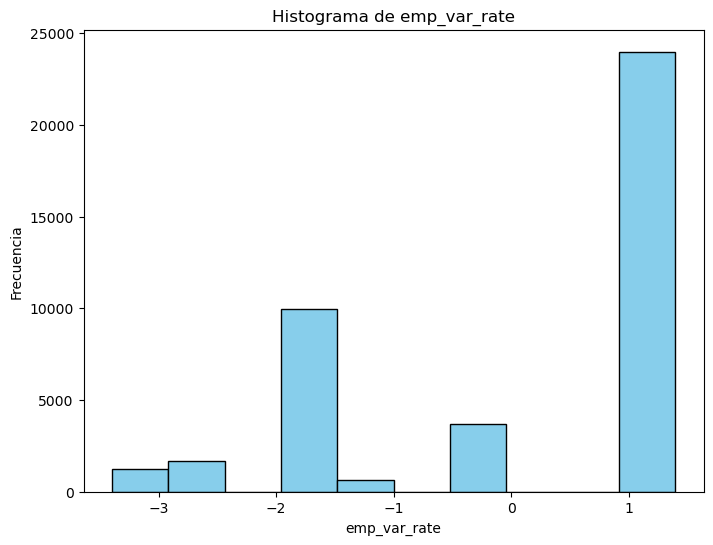

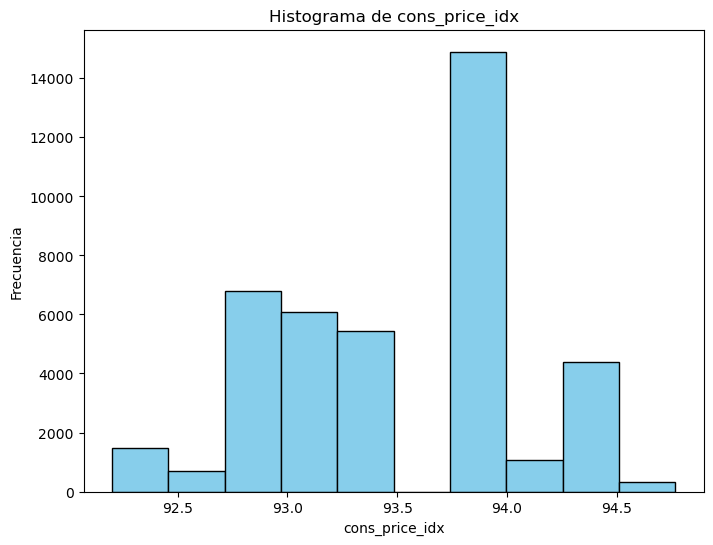

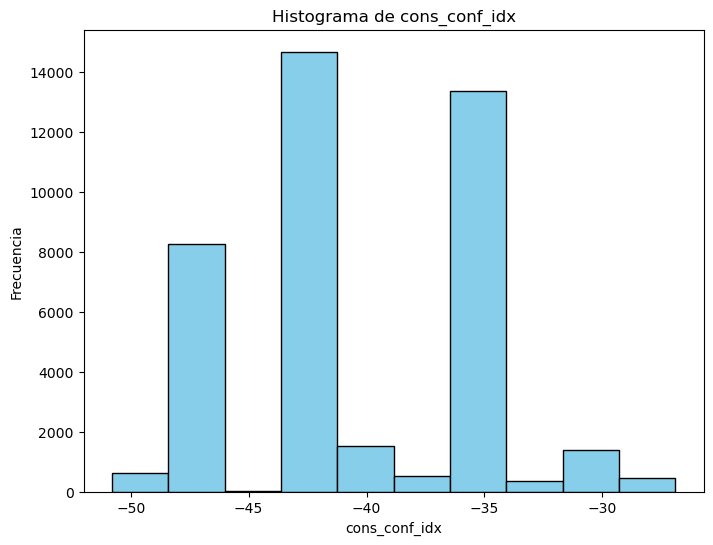

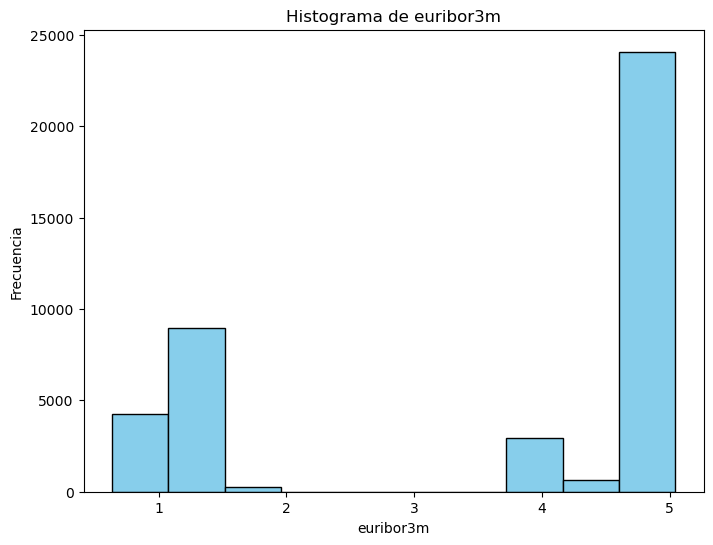

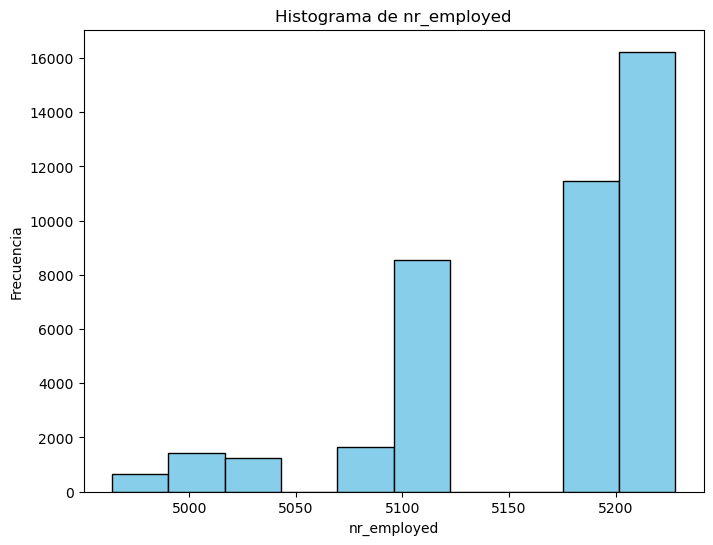

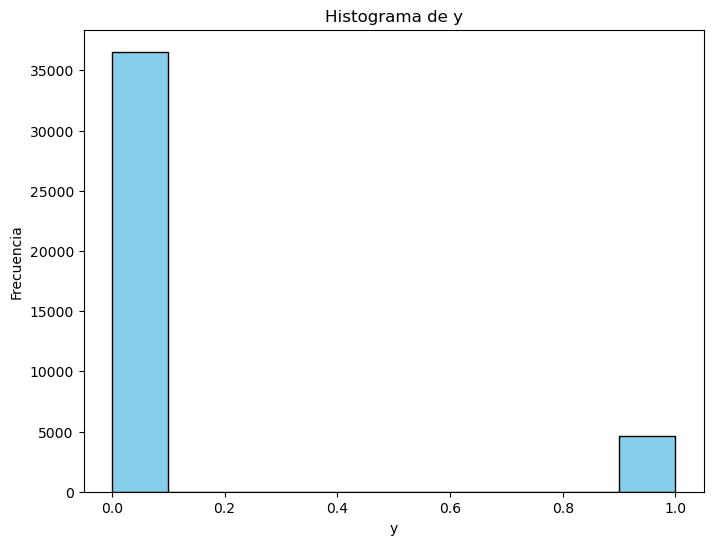

In [20]:
import matplotlib.pyplot as plt

# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Generar histogramas para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Si además queremos saber el tipo del dato, accedemos a la propiedad `dtypes`.

*Nota*: las cadenas de texto se marcan como `object` dentro de un DataFrame

Cada `DataFrame` tiene un índice. Si no lo hemos especificado, será un incremental sin relación con nuestros datos. El uso de índices está recomendado cuando tratamos con datos grandes, ya que permite acceder a las filas por _hash_ en lugar de tener que iterar por todas ellas para encontrar el valor que se busca. Los índices también son importantes a la hora de realizar agregaciones y cruces entre tablas.

Para consultar cuál es el índice de un DataFrame, accedemos a la propiedad `index`.

Podemos alterarlo con `set_index`. El nuevo índice puede ser una o varias columnas.

Podemos seleccionar un listado de columnas a devolver de la siguiente forma:
viviendas[['housing_median_age', 'population']].head()

Hay tres operadores fundamentales para seleccionar filas y columnas: `loc`, `iloc` y `[]`. La diferencia fundamental entre `loc` e `iloc` es que el primero requiere _etiquetas_ y el segundo, índices numéricos (la `i` inicial viene de `integer`).


### 2.1. Selección por índices numéricos

Para acceder por posición usando índices numéricos, se usa `iloc[]`, como en los siguientes ejemplos:

## 6. Resumen estadístico

Pandas provee una serie de funciones de resumen estadístico que podemos aplicar sobre una columna concreta, o sobre todas las del DataFrame.:

In [ ]:
people = ['Ann','Brandon','Chen','David','Emily','Farook',
          'Gagan','Hamish','Imran','Julio','Katherine','Lily']
age = [21,12,32,45,37,18,28,52,5,40,48,15]
weight = [55,35,77,68,70,60,72,69,18,65,82,48]
height = [160,135,170,165,173,168,175,159,105,171,155,158]

In [ ]:
import matplotlib.pyplot as plt

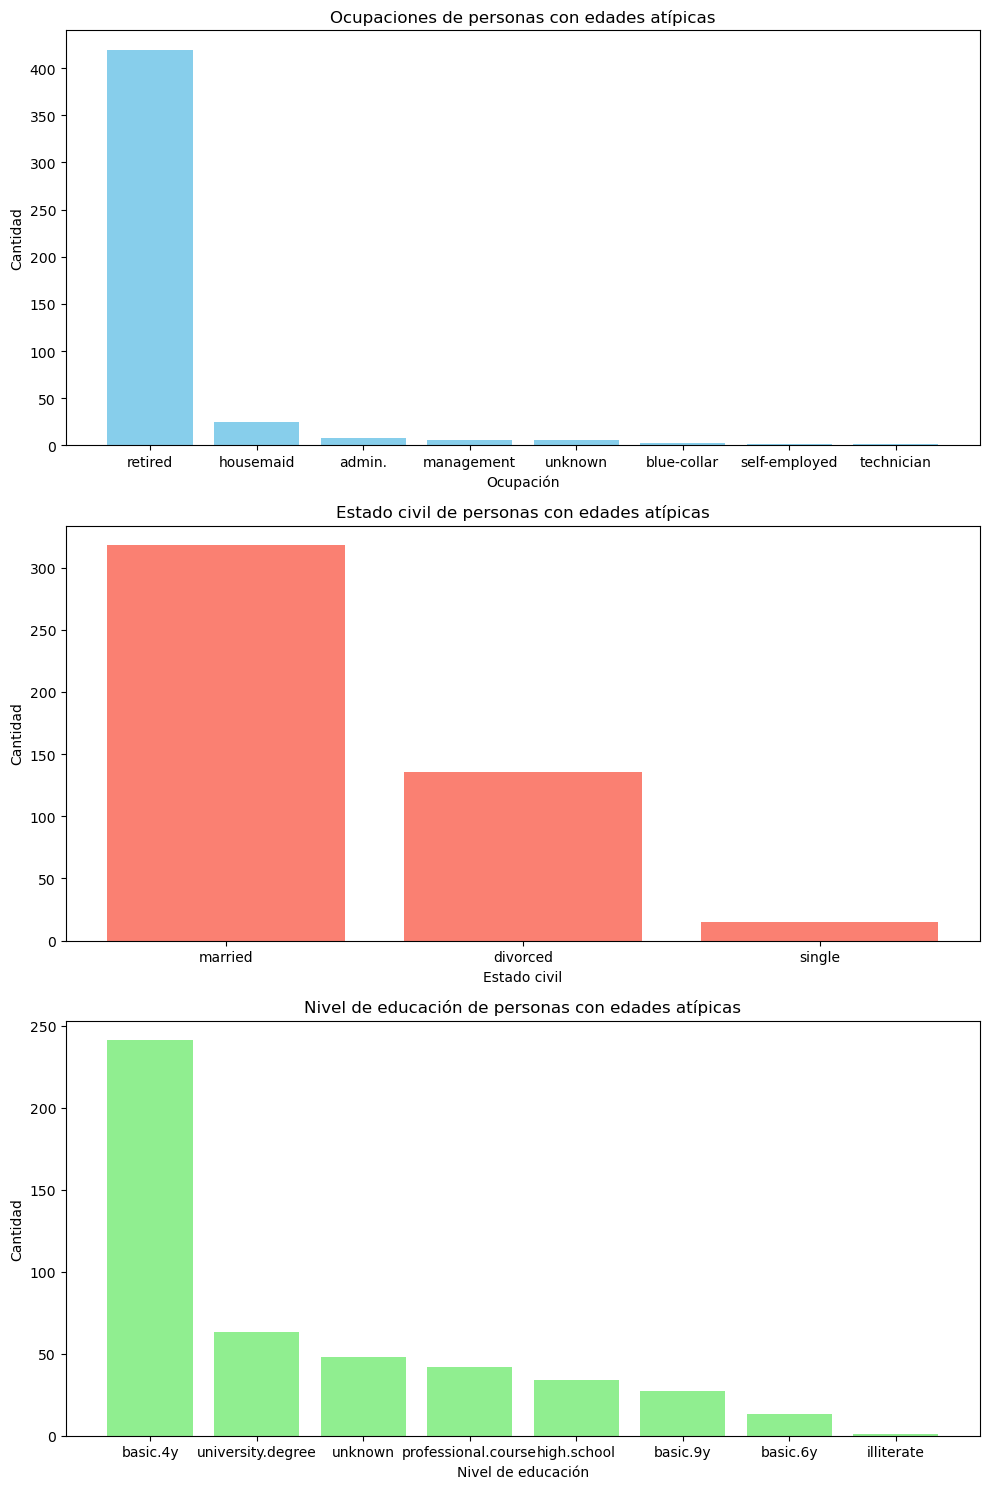

In [37]:
# Filtrar el DataFrame original para obtener solo las observaciones con edades atípicas
outliers_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Analizar características de las personas con edades atípicas
occupation_counts = outliers_age['job'].value_counts()
marital_counts = outliers_age['marital'].value_counts()
education_counts = outliers_age['education'].value_counts()
# Aquí puedes agregar más análisis para otras características

# Visualizar los patrones comunes en las ocupaciones, estado civil y educación
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de barras para ocupaciones
axs[0].bar(occupation_counts.index, occupation_counts.values, color='skyblue')
axs[0].set_title('Ocupaciones de personas con edades atípicas')
axs[0].set_xlabel('Ocupación')
axs[0].set_ylabel('Cantidad')

# Gráfico de barras para estado civil
axs[1].bar(marital_counts.index, marital_counts.values, color='salmon')
axs[1].set_title('Estado civil de personas con edades atípicas')
axs[1].set_xlabel('Estado civil')
axs[1].set_ylabel('Cantidad')

# Gráfico de barras para educación
axs[2].bar(education_counts.index, education_counts.values, color='lightgreen')
axs[2].set_title('Nivel de educación de personas con edades atípicas')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


# Filtrar el DataFrame original para obtener solo las observaciones con edades atípicas
outliers_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Analizar características de las personas con edades atípicas
occupation_counts = outliers_age['job'].value_counts()
marital_counts = outliers_age['marital'].value_counts()
education_counts = outliers_age['education'].value_counts()
# Aquí puedes agregar más análisis para otras características

# Visualizar los patrones comunes en las ocupaciones, estado civil y educación
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de barras para ocupaciones
axs[0].bar(occupation_counts.index, occupation_counts.values, color='skyblue')
axs[0].set_title('Ocupaciones de personas con edades atípicas')
axs[0].set_xlabel('Ocupación')
axs[0].set_ylabel('Cantidad')

# Gráfico de barras para estado civil
axs[1].bar(marital_counts.index, marital_counts.values, color='salmon')
axs[1].set_title('Estado civil de personas con edades atípicas')
axs[1].set_xlabel('Estado civil')
axs[1].set_ylabel('Cantidad')

# Gráfico de barras para educación
axs[2].bar(education_counts.index, education_counts.values, color='lightgreen')
axs[2].set_title('Nivel de educación de personas con edades atípicas')
axs[2].set_xlabel('Nivel de educación')
axs[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


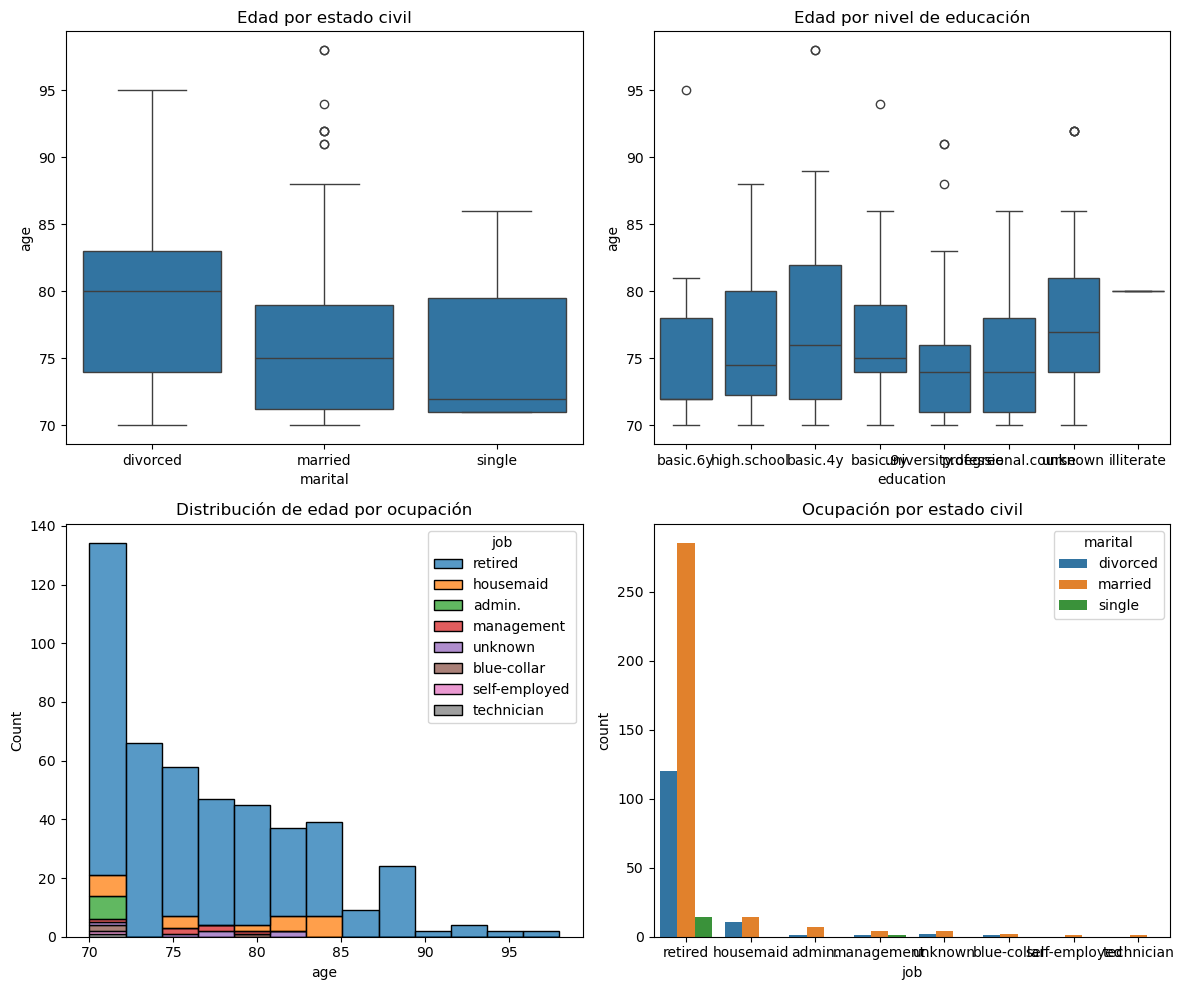

In [38]:
# Comparación de la edad con otras características
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot de la edad por estado civil
sns.boxplot(x='marital', y='age', data=outliers_age, ax=axs[0, 0])
axs[0, 0].set_title('Edad por estado civil')

# Boxplot de la edad por nivel de educación
sns.boxplot(x='education', y='age', data=outliers_age, ax=axs[0, 1])
axs[0, 1].set_title('Edad por nivel de educación')

# Histograma de la edad por ocupación
sns.histplot(x='age', hue='job', data=outliers_age, ax=axs[1, 0], multiple='stack')
axs[1, 0].set_title('Distribución de edad por ocupación')

# Countplot de ocupación por estado civil
sns.countplot(x='job', hue='marital', data=outliers_age, ax=axs[1, 1])
axs[1, 1].set_title('Ocupación por estado civil')

plt.tight_layout()
plt.show()


In [6]:
# Verificar tipos de datos y características de las columnas en df_test
print("Información de df_test:")
print(df_test.info())
print("\nTipos de datos de df_test:")
print(df_test.dtypes)
print("\nPrimeras filas de df_test:")
print(df_test.head())

# Verificar tipos de datos y características de las columnas en df_train
print("\nInformación de df_train:")
print(df_train.info())
print("\nTipos de datos de df_train:")
print(df_train.dtypes)
print("\nPrimeras filas de df_train:")
print(df_train.head())


Información de df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf

## 2.EDA y Visual EDA

## 3. Preprocessing data


In [21]:
import pandas as pd

# Cargar los datos
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Visualizar las primeras filas
print("Primeras filas de df_train:")
print(df_train.head())

print("\nPrimeras filas de df_test:")
print(df_test.head())

# Obtener información general
print("\nInformación de df_train:")
print(df_train.info())

print("\nTipos de datos de df_train:")
print(df_train.dtypes)

# Resumen estadístico
print("\nResumen estadístico de df_train:")
print(df_train.describe())

# Exploración de variables categóricas
print("\nValores únicos de la columna 'job':")
print(df_train['job'].unique())

# Exploración de valores faltantes
print("\nValores faltantes por columna en df_train:")
print(df_train.isnull().sum())


Primeras filas de df_train:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_emp

DUMMIES

In [30]:
import pandas as pd

# Cargar los datos
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Convertir variables categóricas en variables dummy
df_train = pd.get_dummies(df_train, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'])

# Reemplazar valores NaN en la columna 'default' con el valor más común
most_common_default = df_train['default'].value_counts().idxmax()
df_train['default'].fillna('unknown', inplace=True)

# Convertir variables categóricas binarias
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    df_train[col] = df_train[col].map({'no': 0, 'yes': 1})

# Verificar los cambios
print("Primeras filas de df_train después de la conversión:")
print(df_train.head())


Primeras filas de df_train después de la conversión:
   age  default  housing  loan  duration  campaign  pdays  previous  \
0   44      NaN      1.0   0.0       210         1    999         0   
1   53      0.0      0.0   0.0       138         1    999         0   
2   28      0.0      1.0   0.0       339         3      6         2   
3   39      0.0      0.0   0.0       185         2    999         0   
4   55      0.0      1.0   0.0       137         1      3         1   

   emp_var_rate  cons_price_idx  ...  month_oct  month_sep  day_of_week_fri  \
0           1.4          93.444  ...      False      False            False   
1          -0.1          93.200  ...      False      False             True   
2          -1.7          94.055  ...      False      False            False   
3          -1.8          93.075  ...      False      False             True   
4          -2.9          92.201  ...      False      False             True   

   day_of_week_mon  day_of_week_thu  day_of_w

In [31]:
import matplotlib.pyplot as plt

plt.hist(df_train['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()



ModuleNotFoundError: No module named 'matplotlib'

## 4. Creación del modelo y división del dataset

In [39]:
# 1. Cargar los datos de prueba
df_test = pd.read_csv("credit-test.csv")

# 2. Aplicar las mismas transformaciones que en el conjunto de entrenamiento
# Por ejemplo, puedes usar las mismas funciones de preprocesamiento que utilizaste en el conjunto de entrenamiento

# 3. Realizar predicciones en el conjunto de prueba
X_test = df_test.drop(columns=['y'])
y_test = df_test['y']
y_pred_test = model.predict(X_test)

# 4. Evaluar el rendimiento en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", accuracy_test)


KeyError: "['y'] not found in axis"

## 5. Entrenamiento

## 6. Análisis de resultados

## 7. Realización de predicciones

## 8. Visualización